<a href="https://colab.research.google.com/github/n9quan/QR_Colab/blob/main/WS_1.7_Normal_distribution_curve_fitting_Nguyen_Chinh_Quan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Learning objectives

1. Understand distribution
2. Recognize normal distribution by histogram
4. Fit distribution curve to data
5. Use distribution to calculate probability

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Upload the data set

We will use the cardio data set from the last worksheet. If you haven't done so, please download the file `cardio_train.csv` from this [link](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset), then upload it and assign it to a variable named `cardio`. You may want to read the description on Kaggle and print out the data to see the columns and understand the data better. I put the file on Github to make the upload process easier.

In [ ]:
data_url = "https://github.com/lhprime/MATH105/blob/main/cardio_train.csv?raw=true"
cardio = pd.read_csv(data_url, sep = ';')

In [ ]:
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


#Creating histogram and fitting normal distribution curve

The purpose of this section is to show you how to look at a data and find a suitable distribution to represent it. This is called "fitting distribution" to the data. The example that we will look at is quite simple and can be fitted by a normal distribution.

**Exercise:** Create a histogram of the `height` column to look at the shape of the distribution. Start with 200 different bins and set the `density` parameter to `True`. Change the number of bins to find a good histogram.

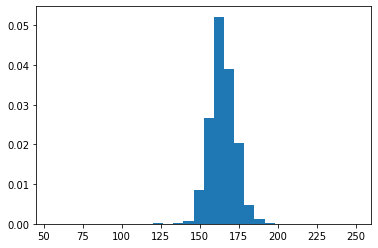

In [ ]:
# Solution goes here

(array([9.08424908e-06, 1.58974359e-05, 1.58974359e-05, 1.13553114e-05,
        2.27106227e-06, 2.27106227e-06, 9.08424908e-06, 1.58974359e-05,
        2.49816850e-05, 9.08424908e-06, 8.17582418e-05, 3.86080586e-05,
        4.99633700e-05, 3.86080586e-04, 2.81838828e-03, 1.61472527e-02,
        3.77223443e-02, 5.43646886e-02, 3.05049084e-02, 1.34764835e-02,
        2.84109890e-03, 3.47472527e-04, 7.26739927e-05, 2.27106227e-06,
        2.27106227e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.27106227e-06]),
 array([ 55.        ,  61.29032258,  67.58064516,  73.87096774,
         80.16129032,  86.4516129 ,  92.74193548,  99.03225806,
        105.32258065, 111.61290323, 117.90322581, 124.19354839,
        130.48387097, 136.77419355, 143.06451613, 149.35483871,
        155.64516129, 161.93548387, 168.22580645, 174.51612903,
        180.80645161, 187.09677419, 193.38709677, 199.67741935,
        205.96774194, 212.25806452, 218.5483871 , 224.

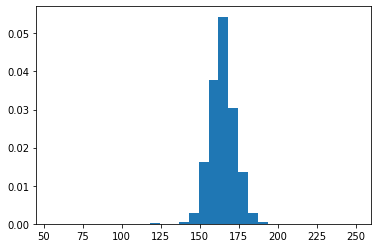

In [ ]:
plt.hist(cardio['height'],bins = 31, density = True)

**Exercise:** Create a vertical boxplot of the `height` column ( set the parameter `vert` to `False`).

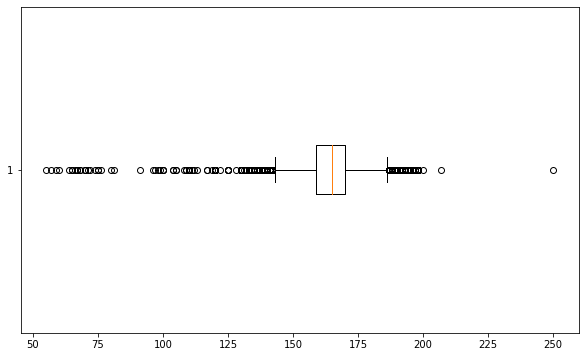

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(cardio['height'], vert = False)
plt.show()

Look at the shape of the histogram and we can see that it is quite similar to a normal distribution. (Why?) One annoying thing is that our "bell" is too small and there are big gaps on both sides. This is caused by few very small or very large values which we call "outliers". From the boxplot we see that most of the data is between the lower and upper whiskers. Then we can eliminate the ouliers by restricting the value range from the lower to upper whisker.

We will now calculate the whiskers as in the previous worksheet.

**Exercise:** Calculate the value of the quantiles at 0.25 and 0.75 and assign them to the variables `q1` and `q3`, respectively.

In [ ]:
# Solution goes here
q1 = cardio.quantile(0.25)
q3 = cardio.quantile(0.75)

**Exercise**: Use `q1` and `q3` to calculate `lower_whisker` and `upper_whisker` as in the previous worksheet.

In [ ]:
lower_whisker = q1 - (1.5 * (q3-q1)) # calculate the lower whisker
upper_whisker = q3 + (1.5 * (q3-q1)) # calculate the upper whisker

**Exercise:** Use the same method as in the previous worksheets to select only the data from the `height` column that is smaller than `upper_whisker` and greater than `lower_whisker`. Assign this to a new variable called `data1`.

In [ ]:
# Solution goes here
data12 = cardio[(cardio['height'] >= lower_whisker['height']) & (cardio['height'] <= upper_whisker['height'])]
data1 = data12['height']
data1

0        168
1        156
2        165
3        169
4        156
        ... 
69995    168
69996    158
69997    183
69998    163
69999    170
Name: height, Length: 69481, dtype: int64

We can now create a new histogram for the data without outliers.

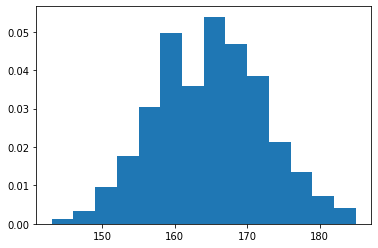

In [ ]:
plt.hist(data1, bins = np.arange(data1.min(),data1.max(), 3), density = True);

Now the histogram looks more similar to a normal distribution and we can draw a normal distribution curve that "fit" the data. Remember that a normal curve is identified by 2 parameters: the mean and the standard deviation. First we calculate the sample mean `mu1` and sample standard deviation `sigma1`. 

In [ ]:
mu1 = data1.mean()
sigma1 = data1.std()

The next task is to draw a "bell curve". This curve is actually a graph of a mathematic function called the probability density function (`pdf`). We don't have to worry about the formula of the function because we can call it from Python library "scipy.stats" (imported as "st" in our worksheet).

In [ ]:
import scipy.stats as st

From `st` first we call the normal distribution using `st.norm`. Think of `st` as a big box that contains many small boxes. Each small box is one distribution, and `norm` is the box with everything about normal distribution. Inside the `norm` box we have many functions, and `pdf` is one of them, so we call out the pdf by using `st.norm.pdf`.

The two command lines generate a set `x1` of 100 numbers of equal distance in the range `(mu1 - 3sigma1, mu1 + 3sigma1)`. (Why do we want this range?) The `linspace` command behaves similarly to the `arange` command we have already seen, except that we specify the number of points we want, rather than the step size.

Then we draw a plot of the normal curve on these points.

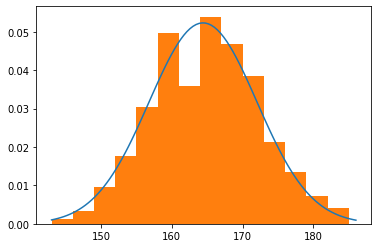

In [ ]:
x1 = np.linspace(data1.min(),data1.max(), 100)
plt.plot(x1, st.norm.pdf(x1, mu1, sigma1));
plt.hist(data1, bins = np.arange(data1.min(),data1.max(), 3), density = True);

We have manually fitted the normal distribution curve to our data. This allowed us to assume that the real distribution of the height is normal with parameters `mu1` and `sigma1`, and use the formula of the normal distribution to calculate some probabilities. For example, let's calculate the probability of a randomly chosen person to be taller than 180 cm. To do this, we can use the function `cdf` (cumulative distribution function) from the box `st.norm` to calculate the "right tail" (the area under the curve and on the right of a point).

In [ ]:
1 - st.norm.cdf(180, mu1, sigma1)

0.020336090236264037

Before proceeding, convince yourself that the formula is correct.

**Exercise**: Calculate the probability of a person to have height between 160 and 170 cm.

In [ ]:
# Solution goes here

0.48691237134671495

In [ ]:
st.norm.cdf(170, mu1, sigma1) - st.norm.cdf(160, mu1, sigma1)

0.4869123713467505

Python provides a better way to find a fit curve to a data by using the function `fit`. This function will output the parameters of the curve that provides the best fit. In the case of the normal distribution, the parameters are the mean and the standard deviation.

Next, we will use the fit function and compare the outputs to the sample mean `mu1` and standard deviation `sigma1` that we used before.

In [ ]:
a1, b1 = st.norm.fit(data1)
print(a1, b1, mu1, sigma1)

164.4004691930168 7.6211590197835895 164.4004691930168 7.621213863850931


## Separate data by gender and fit curve 
In this section you will practice fitting normal curves. Your job is to separate the height by gender (1 means female, 2 means male) and then to perform a normal curve fit on each of the data sets.

In [ ]:
data2 = cardio["height"][(cardio["gender"] == 2) & (cardio["height"] < upper_whisker['height']) & (cardio["height"] > lower_whisker['height'])]

This line selects only the data from the height column that's smaller than the upper whisker, greater than the lower whisker, and for which the gender is 2 (i.e. male).

**Exercise:** Select the same data for women and assign it to the variable `data3`.

In [ ]:
data3 = cardio["height"][(cardio["gender"] == 1) & (cardio["height"] < upper_whisker['height']) & (cardio["height"] > lower_whisker['height'])]

**Exercise**: Calculate the mean `mu2` and standard deviation `sigma2` for `data2`. Calculate the mean `mu3` and standard deviation `sigma3` for `data3`. Use them to create the ranges `x2` and `x3` for the density curves.

In [ ]:
mu2 = data2.mean()
sigma2 = data2.std()
mu3 = data3.mean()
sigma3 = data3.std()

**Exercise:** Produce the histograms and the distribution curves for both data sets on the same plot. Can we say that in general the men is taller than the women by look at the two density curves?

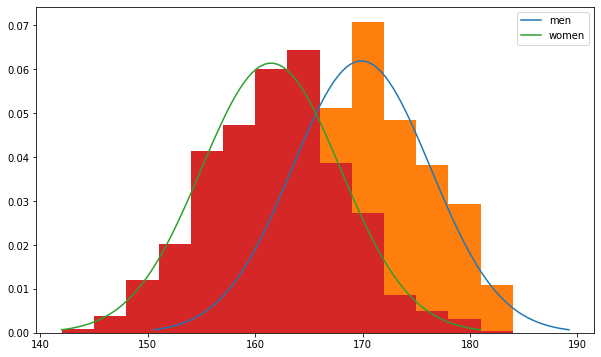

In [ ]:
# Solution goes here


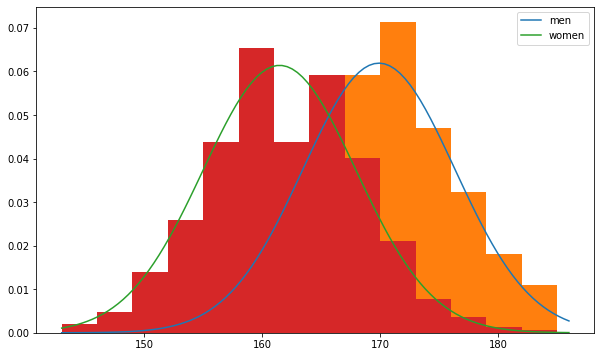

In [ ]:
plt.figure(figsize=(10,6))
x2 = np.linspace(data2.min(),data2.max(), 100)
plt.plot(x2, st.norm.pdf(x2, mu2, sigma2), label = "men");
plt.hist(data2, bins = np.arange(data2.min(),data2.max(), 3), density = True);
x3 = np.linspace(data3.min(),data3.max(), 100)
plt.plot(x3, st.norm.pdf(x3, mu3, sigma3), label = "women");
plt.hist(data3, bins = np.arange(data3.min(),data3.max(), 3), density = True);
plt.legend()

# Calculating BMI and checking if it is normal

The BMI (Body Mass Index) is an important index that indicates body's fitness. BMI is calculated by the formula:

$BMI=\frac{weight}{height^2}\times 1000$

In this section we calculate BMI data from the data set and fit a distribution curve to it. First we calculate the BMI column from the height and weight.


In [ ]:
bmi = (cardio.weight / (cardio.height * cardio.height)) * 10000

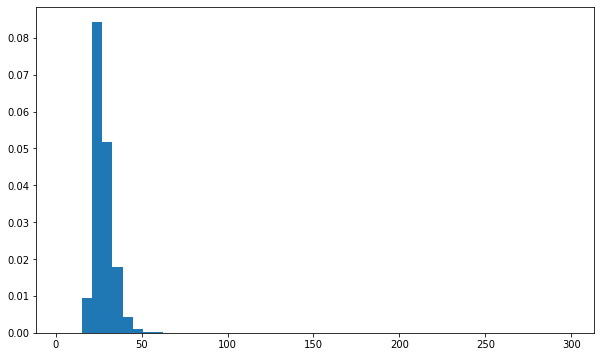

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(bmi, bins = 50, density = True)
plt.show()

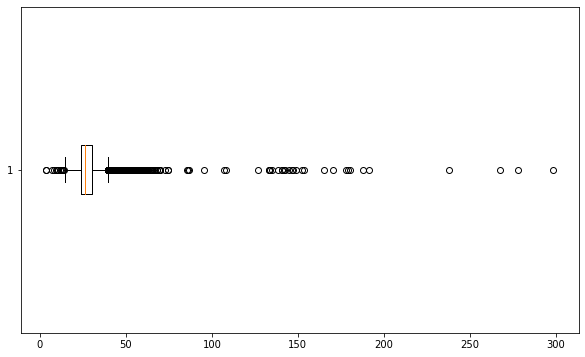

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(bmi, vert = False)
plt.show()

The next step is to eliminate the outliers that are outside of the lower and upper whiskers.

**Exercise:** As before, calculate the quantiles at 0.25 and 0.75 and assign them to the variables `q1_bmi` and `q3_bmi`, respectively, so that we can calculate the lower and upper whisker

In [ ]:
# Solution goes here
q1_bmi = bmi.quantile(0.25)
q3_bmi = bmi.quantile(0.75)

Look at the boxplot we can see that there are many large values that are considered as outliers. If we keep the factor 1.5 for the upper whisker we may throw away too many data. Thus we may increase the factor to 2.5 to accomodate the long right tail

In [ ]:
lower_whisker_bmi = q1_bmi - (1.5 * (q3_bmi-q1_bmi)) # calculate the lower whisker
upper_whisker_bmi = q3_bmi + (2.5 * (q3_bmi-q1_bmi)) # calculate the upper whisker

**Exercise:** As before, select only the parts of the `bmi` data that is smaller than the upper whisker and greater than the lower whisker and assign it to a new variable called `data`. Also calculate the mean and standard deviation and assign them to `mu` and `sigma`.

In [ ]:
data = bmi[(bmi > lower_whisker_bmi) & (bmi < upper_whisker_bmi)]
mu = data.mean()
sigma = data.std()

Let's check the histogram again

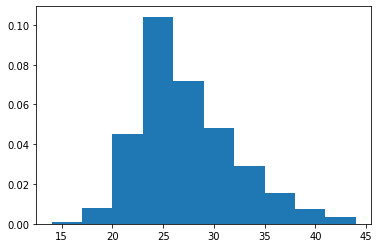

In [ ]:
plt.hist(data, bins = np.arange(int(lower_whisker_bmi), int(upper_whisker_bmi) + 1, 3), density = True)
plt.show()

**Question:** Looking at the results, do you think the data really follows the normal distribution?

**Exercise:** Assuming that the BMI data follows the normal distribution, fit a normal density curve to the data.

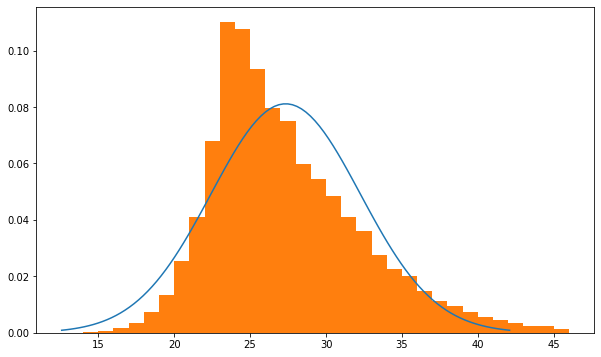

In [ ]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(figsize=(10,6))
plt.plot(x, st.norm.pdf(x, mu, sigma));
plt.hist(data, bins = np.arange(int(lower_whisker_bmi), int(upper_whisker_bmi) + 1), density = True)
plt.show()

##Fitting skewed distribution to BMI data

Now we see that the BMI data does not really follow the normal distribution. It has the bell shape, but it is not symmetric and has a longer right tail. This data can be fitted by a *skewed normal distribution*. It is similar to normal distribution with 2 parameters of the mean (location) and standard deviation, but it has an extra parameter that determines the *shape* of the distribution.

It is quite complicated to compute these parameters by hand, but lucky for us, Python can find the parameters using the function `fit`. This time we use the distribution `skewnorm` instead of `norm`.


In [ ]:
a1, loc1, scale1 = st.skewnorm.fit(data)
a1, loc1, scale1

(3.6627122203080162, 21.557952915769327, 7.589284204438327)

Now we put the parameters into the `pdf` of skew normal and draw the curve.

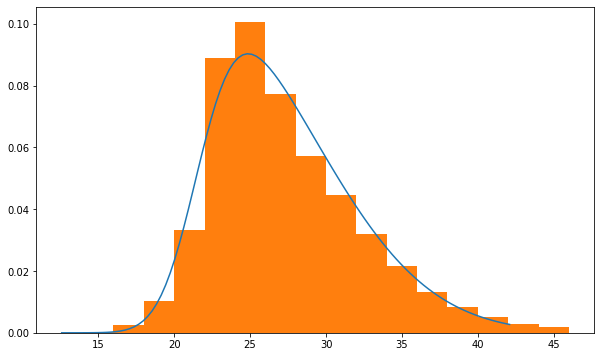

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x, st.skewnorm.pdf(x, a1, loc = loc1, scale = scale1));
plt.hist(data, bins = range(int(lower_whisker_bmi), int(upper_whisker_bmi) + 1,2), density = True)
plt.show()

We now can use the skewed normal density function to calculate the probability of a person to be overweight (BMI > 30).

In [ ]:
1 - st.skewnorm.cdf(30, a1, loc = loc1, scale = scale1)

0.2659810820730517

**Exercise**: Separate the men's and women's BMI data and find the density curve for each data. Can we make any conclusion by looking at the two curves (e.g. the men's BMI is higher than women's)?

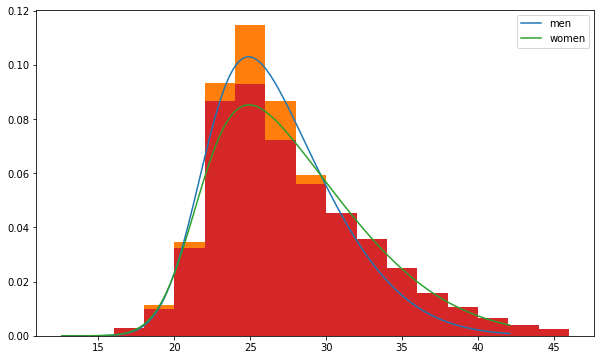

In [ ]:
plt.figure(figsize=(10,6))
men_bmi = bmi[(cardio["gender"] == 2)][(bmi > lower_whisker_bmi) & (bmi < upper_whisker_bmi)]
women_bmi = bmi[(cardio["gender"] == 1)][(bmi > lower_whisker_bmi) & (bmi < upper_whisker_bmi)]
a_m, loc_m, scale_m = st.skewnorm.fit(men_bmi)
a_f, loc_f, scale_f = st.skewnorm.fit(women_bmi)
plt.plot(x, st.skewnorm.pdf(x, a_m, loc = loc_m, scale = scale_m), label = 'men');
plt.hist(men_bmi, bins = range(int(lower_whisker_bmi), int(upper_whisker_bmi) + 1,2), density = True);
plt.plot(x, st.skewnorm.pdf(x, a_f, loc = loc_f, scale = scale_f), label = 'women');
plt.hist(women_bmi, bins = range(int(lower_whisker_bmi), int(upper_whisker_bmi) + 1,2), density = True);
plt.legend()

Calculate probability of having BMI larger than 30

In [ ]:
1-st.skewnorm.cdf(30, a_f, loc_f, scale_f)

0.29493870341518524

In [ ]:
1-st.skewnorm.cdf(30, a_m, loc_m, scale_m)

0.20111804505991815

**Exercise:** Calculate probability of having BMI smaller than 20

In [ ]:
#Solution goes here

0.02733486105186776

In [ ]:
st.skewnorm.cdf(20, a_f, loc_f, scale_f)

0.027106239295310697

In [ ]:
st.skewnorm.cdf(20, a_m, loc_f, scale_f)

0.04646683316841882